### TP Regression

### 1 - R√©gression lin√©aire par moindres carr√©s

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [237]:
data = np.loadtxt("dataRegLin2D.txt")
X1 = data[:, 0]  # Premi√®re colonne (x1)
X2 = data[:, 1]  # Deuxi√®me colonne (x2)
y = data[:, 2]   # Troisi√®me colonne (y)

Cette fonction applique la **r√©gression lin√©aire** en utilisant la **formule analytique** des moindres carr√©s :

$$
w = (X^T X)^{-1} X^T y
$$


In [238]:
def regression_moindres_carres(X, y):
    X_biais = np.c_[np.ones((X.shape[0], 1)), X]
    w = np.linalg.inv(X_biais.T.dot(X_biais)).dot(X_biais.T).dot(y)
    return w

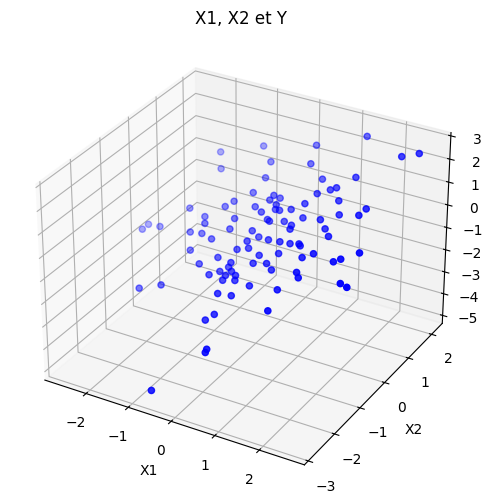

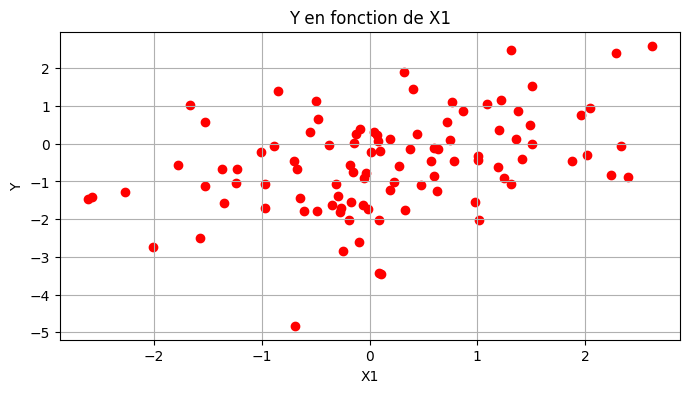

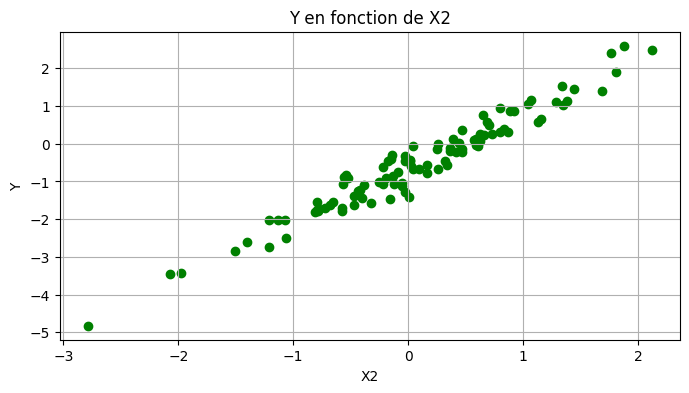

In [239]:
    # Graphique 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, c='b', marker='o')

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("X1, X2 et Y")

plt.show()

# Graphique 2D : y en fonction de X1
plt.figure(figsize=(8, 4))
plt.scatter(X1, y, color='r', marker='o')
plt.xlabel("X1")
plt.ylabel("Y")
plt.title("Y en fonction de X1")
plt.grid()
plt.show()

# Graphique 2D : y en fonction de X2
plt.figure(figsize=(8, 4))
plt.scatter(X2, y, color='g', marker='o')
plt.xlabel("X2")
plt.ylabel("Y")
plt.title("Y en fonction de X2")
plt.grid()
plt.show()


- \( Y \) d√©pend fortement de \( X2 \) de mani√®re lin√©aire (points bien align√©s).  
- Aucune relation lin√©aire √©vidente entre \( Y \) et \( X1 \) (dispersion al√©atoire).  
- \( X2 \) est le facteur dominant pour pr√©dire \( Y \).

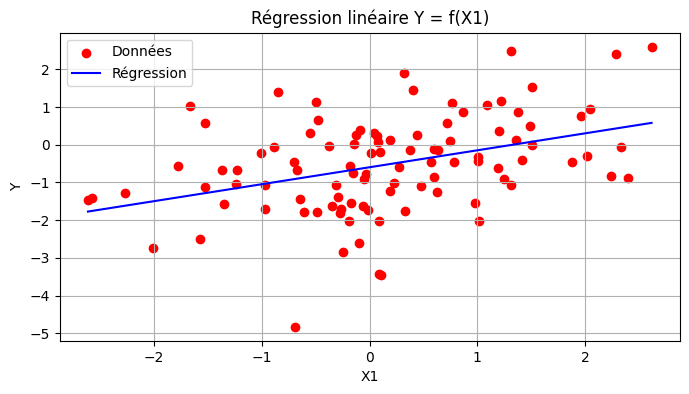

In [240]:
w1 = regression_moindres_carres(X1, y)
X1_pred = np.linspace(X1.min(), X1.max(), 100).reshape(-1, 1)
Y1_pred = np.c_[np.ones((X1_pred.shape[0], 1)), X1_pred] @ w1 
plt.figure(figsize=(8, 4))
plt.scatter(X1, y, color='r', label="Donn√©es")
plt.plot(X1_pred, Y1_pred, color='b', label="R√©gression")
plt.xlabel("X1")
plt.ylabel("Y")
plt.title("R√©gression lin√©aire Y = f(X1)")
plt.legend()
plt.grid()
plt.show()

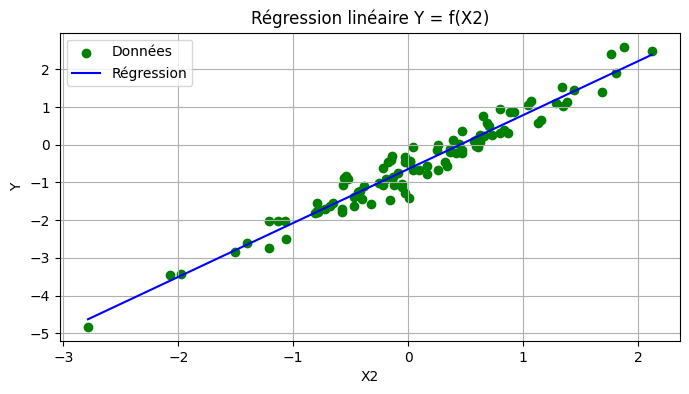

In [241]:
w2 = regression_moindres_carres(X2, y)
X2_pred = np.linspace(X2.min(), X2.max(), 100).reshape(-1, 1)
Y2_pred = np.c_[np.ones((X2_pred.shape[0], 1)), X2_pred] @ w2  # Pr√©diction

plt.figure(figsize=(8, 4))
plt.scatter(X2, y, color='g', label="Donn√©es")
plt.plot(X2_pred, Y2_pred, color='b', label="R√©gression")
plt.xlabel("X2")
plt.ylabel("Y")
plt.title("R√©gression lin√©aire Y = f(X2)")
plt.legend()
plt.grid()
plt.show()

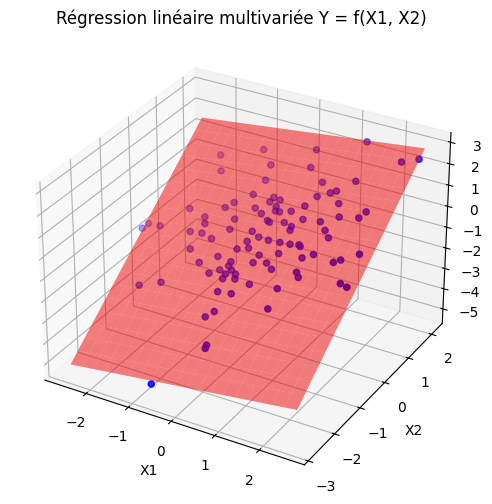

In [242]:
# üéØ 3Ô∏è‚É£ R√©gression Y = f(X1, X2) (Multivari√©e)
X_multi = np.c_[X1, X2]  # Matrice avec X1 et X2
w_multi = regression_moindres_carres(X_multi, y)

# G√©n√©rer des pr√©dictions pour la surface 3D
X1_range = np.linspace(X1.min(), X1.max(), 20)
X2_range = np.linspace(X2.min(), X2.max(), 20)
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)
Y_grid = w_multi[0] + w_multi[1] * X1_grid + w_multi[2] * X2_grid

# Trac√© 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='b', label="Donn√©es")
ax.plot_surface(X1_grid, X2_grid, Y_grid, alpha=0.5, color='r')

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("R√©gression lin√©aire multivari√©e Y = f(X1, X2)")
plt.show()

- Graphique 1 : R√©gression lin√©aire entre Y et X1.
    ‚Üí Pas de tendance forte (comme observ√© pr√©c√©demment).
- Graphique 2 : R√©gression lin√©aire entre Y et X2.
    ‚Üí Bonne approximation lin√©aire, car X2 influence fortement Y.
- Graphique 3 : R√©gression lin√©aire multivari√©e en 3D.
    ‚Üí Plan de r√©gression qui s'ajuste aux donn√©es.

In [243]:
def predire(xtest, w):
    xtest_biais = np.c_[np.ones((xtest.shape[0], 1)), xtest]  # Ajout du biais
    return xtest_biais @ w  # Produit matriciel pour obtenir ytest

In [244]:
def erreur_prediction(X, y, w):
    y_pred = predire(X, w)  # Pr√©dictions sur les donn√©es d'entra√Ænement
    err = np.mean((y - y_pred) ** 2)  
    return err

In [245]:
X = np.c_[X1, X2]  # Matrice avec X1 et X2

w_appris = regression_moindres_carres(X, y)

# Tester la pr√©diction avec une nouvelle donn√©e
xtest = np.array([[1, 2]])  # Exemple arbitraire
ytest_pred = predire(xtest, w_appris)

# Calculer l'erreur sur les donn√©es d'entra√Ænement
err_train = erreur_prediction(X, y, w_appris)

# Afficher les r√©sultats
print("Vecteur des coefficients appris (w) :", w_appris)
print("Pr√©diction pour xtest =", xtest, "-> ytest =", ytest_pred)
print("Erreur quadratique moyenne sur les donn√©es d'entra√Ænement :", err_train)

Vecteur des coefficients appris (w) : [-0.67806079  0.2451943   1.37054629]
Pr√©diction pour xtest = [[1 2]] -> ytest = [2.3082261]
Erreur quadratique moyenne sur les donn√©es d'entra√Ænement : 0.010247981453700135



1. **Vecteur des coefficients appris \( w \) :**  
   - **\( w_0 = -0.678 \)** ‚Üí Terme de biais (intercept).
   - **\( w_1 = 0.245 \)** ‚Üí Influence de \( X_1 \) sur \( Y \).
   - **\( w_2 = 1.370 \)** ‚Üí Influence de \( X_2 \) sur \( Y \), qui est plus forte que \( X_1 \).

2. **Pr√©diction pour \[ x_test = (1,2) ] :**  
   - Le mod√®le pr√©dit **\( Y \approx 2.31 \)** pour une nouvelle donn√©e \( (X_1 = 1, X_2 = 2) \).
   - La valeur semble **coh√©rente** avec la tendance observ√©e.

3. **Erreur quadratique moyenne sur l‚Äôensemble d‚Äôentra√Ænement :**  
   \[
   err = 0.0102
   \]
   - Cette erreur est tr√®s faible, ce qui indique que le mod√®le s‚Äôadapte bien aux donn√©es d‚Äôapprentissage.
   - Une erreur faible signifie que les pr√©dictions du mod√®le sont proches des valeurs r√©elles.

Le mod√®le de r√©gression lin√©aire est performant, avec une bonne pr√©cision sur les donn√©es d‚Äôapprentissage.  
X_2 a une forte influence sur \( Y \), confirmant son importance dans la pr√©diction.  
Erreur faible, donc l‚Äôapproximation lin√©aire est adapt√©e aux donn√©es.